In [38]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from standalize import normalize,entropy
pd.options.io.excel.xlsx.writer = 'xlsxwriter'

dataset = pd.read_csv(r'C:\Users\shelhen1\OneDrive - jsnu.edu.cn\projects\digital\03.企业绩效数据\datas\中国数字化转型与企业绩效数据汇总.csv', index_col=None, header=0, dtype={'股票代码':'object'})
dataset_ = pd.read_csv('C:\datas\企业信息数据\上市企业补充信息数据.csv',index_col=None, header=0, dtype={'股票代码':'object'})

dataset['两职合一'] = dataset['两职合一'].astype('int')
dataset['营业费用增长率'] = dataset['销售费用增长率'] + dataset['管理费用增长率']
dataset['营业费用增长率'] = dataset['营业费用增长率']/2
dataset['供应链集中度'] = dataset['本期销售额占年度销售总额比例(%)'] + dataset['本期采购额占年度采购总额比例(%)']
dataset['供应链集中度'] = dataset['供应链集中度']/2
dataset['行业代码'] = dataset['行业代码'].apply(lambda x: int(x[1:]))
dataset = dataset[(dataset['行业代码']>12)&(dataset['行业代码']<44)]
# 变量重命名
dataset.rename(columns={
    '固定资产周转率B':'固定资产周转率',
    '总资产周转率B':'总资产周转率',
    '存货周转率B':'存货周转率',
    '应付账款周转率B':'应付账款周转率',
    '应收账款周转率B':'应收账款周转率',
    '净利润增长率B':'净利润增长率',
    '经营活动产生的净流量增长率B':'经营活动产生的净流量增长率',
    '资本积累率B':'资本积累率',
    '利润总额增长率B': '利润总额增长率',
    '托宾Q值B':'托宾Q值',
    '固定资产净利润率B':'固定资产净利润率',
    '总资产净利润率(ROA)B':'总资产净利润率',
    '投入资本回报率（ROIC）':'投入资本回报率',
    '本期销售额占年度销售总额比例(%)':'本期销售额占年度销售总额比例',
    '本期采购额占年度采购总额比例(%)':'本期采购额占年度采购总额比例',
    '两权分离度(%)':'两权分离度',
    '研发人员数量占比(%)':'研发人员数量占比',
    '研发强度': '研发投入',
    '资本保值增值率B':'资本保值增值率',
    '总资产增长率B':'总资产增长率',
    '固定资产增长率B':'固定资产增长率',
    '基本每股收益增长率B':'基本每股收益增长率',
    '营业利润增长率B':'营业利润增长率',
    '净资产收益率增长率B':'净资产收益率增长率',
    '净资产收益率（ROE）B':'净资产收益率',
    '资产报酬率B':'资产报酬率',
    '流动资产净利润率B':'流动资产净利润率',
    '现金及现金等价物周转率B':'现金及现金等价物周转率',
    '股东权益周转率B':'股东权益周转率',
    '流动资产周转率B':'流动资产周转率',
    '非流动资产周转率B':'非流动资产周转率',
    '股权集中度4(%)':'股权集中度',
    '经营活动产生的现金流量净额／负债合计':'经营活动产生的现金流量净额/负债合计',
    'digitalw':'数字化转型程度(吴非)',
    'digitalz':'数字化转型程度(文本)',
    'digitaly':'数字化转型程度(袁淳)',
    'digitalx':'数字化转型程度(谢恒恒)',
    'digitalc':'数字化转型程度(量化)',
}, inplace=True)
dataset.drop(['行业名称','托宾Q值', '本期销售额占年度销售总额比例', '本期采购额占年度采购总额比例', '销售费用增长率', '管理费用增长率','数字化转型程度(吴非)', '数字化转型程度(袁淳)','数字化转型程度(谢恒恒)','股权性质'], axis=1, inplace=True)

dataset = pd.merge(dataset,dataset_,on=['股票代码','截止日期'],how='left')
dataset.dropna(subset=['上市状态','企业年限','股权性质','上市省份'],inplace=True)
# 这些二级指标进一步处理之后需要删除
sts = set(dataset[dataset['上市状态']!='正常上市']['股票代码'].tolist())
dataset['上市日期'] = dataset['截止日期'] - dataset['企业年限']
dataset = dataset[(~dataset['股票代码'].isin(sts))&(dataset['上市日期']<2020)]
dataset.drop(['上市状态','上市日期'],axis=1,inplace=True)
# 计算综合数字化转型指数
W = entropy(dataset[['数字化转型程度(文本)', '数字化转型程度(量化)']])
dataset['数字化转型程度(李寿喜)'] = dataset[['数字化转型程度(文本)', '数字化转型程度(量化)']].dot(W)
dataset = dataset.drop(['数字化转型程度(文本)', '数字化转型程度(量化)','上市城市'], axis=1)
# 定性筛选一些指标
# dataset.drop(['股权性质', '两职合一','独董比例','董事会规模','两权分离度'], axis=1, inplace=True)
# 根据相关性删除一些指标
dels = ['权益乘数','产权比率','负债与权益市价比率','现金比率', '流动比率','总资产增长率', '资本保值增值率','营业总成本增长率','股东权益周转率','流动资产周转率','营业收入现金净含量', '营业利润增长率','基本每股收益增长率', '净资产收益率增长率','营业利润率','经营活动产生的现金流量净额/负债合计', '流动资产净利润率', '资产报酬率', '总营业成本率']  # '净资产收益率'
dataset = dataset.drop(dels, axis=1)
dataset['股权性质'] = dataset['股权性质'].astype('int')
nec_vec=['营业费用增长率','营业总成本增长率','存货周转率','应付账款周转率','负债与权益市价比率','资产负债率','销售期间费用率','总营业成本率']
pass_vec=['股票代码', '截止日期', '行业代码', '数字化转型程度(李寿喜)','上市省份']  # '数字化转型程度(文本)','数字化转型程度(赵宸宇)', '数字化转型程度(量化)',
dataset_ = normalize(dataset, nec_vec, pass_vec).set_index(['股票代码', '截止日期'])

In [39]:
import mapclassify as mc
print(mc.NaturalBreaks(dataset_['数字化转型程度(李寿喜)'], 11))
keyvalue = 0.01
data = dataset_.copy()
# 判别函数，判别多项都满足数字化转型程度为高的数据。
data['digital'] = data['数字化转型程度(李寿喜)'].apply(lambda x: 1 if x>=keyvalue else 0)
data_ = data[data['digital']==1]
# for i in range(2):
data = pd.concat([data,data_], axis=0)
Xnames = data.columns.drop(['数字化转型程度(李寿喜)','digital','行业代码','上市省份'])
X = data[Xnames]
y = data['digital'].values.ravel()

NaturalBreaks

  Interval     Count
--------------------
[0.00, 0.01] |  8849
(0.01, 0.03] |  3844
(0.03, 0.05] |  2123
(0.05, 0.07] |  1231
(0.07, 0.11] |   788
(0.11, 0.16] |   472
(0.16, 0.22] |   276
(0.22, 0.31] |   179
(0.31, 0.41] |    90
(0.41, 0.52] |    61
(0.52, 0.64] |   125


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,precision_score,accuracy_score,recall_score,f1_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


X_train_s, X_test_s, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify=y, random_state=1)
# 将y转化为bool变量
y_train_dummy = pd.get_dummies(y_train)
y_train = y_train_dummy.iloc[:, 1]
# 准确率（Precision）是指模型预测为正例的样本中实际为正例的比例，计算公式为：准确率=真正例数/(真正例数+假正例数)。
# 召回率（Recall）是指实际为正例的样本中被模型预测正确的比例，计算公式为：召回率=真正例数/(真正例数+假负例数)。
# F1值是准确率和召回率的调和平均数，计算公式为：F1值=2准确率召回率/(准确率+召回率)。
# 准确率、召回率和F1值都介于0和1之间，数值越大表示模型性能越好。

# 十折交叉验证，寻找随机森林最优超参数# 1
# param_grid = {'max_features': range(1, X.shape[1]+1) }
# kfold = StratifiedKFold(n_splits=10, shuffle=True,random_state=1)

# model = GridSearchCV(RandomForest(n_estimators=500, random_state=123), param_grid, cv=kfold, n_jobs=-1)


model = RandomForestClassifier(n_estimators=500, max_features=1, random_state=123, n_jobs=-1)

# 将特征变量个数的开平方作为参数max_features的取值，默认使用所有特征变量，等价于袋装法
# model = RandomForest(n_estimators=500, max_features='sqrt', random_state=132, n_jobs=-1)

model.fit(X_train_s, y_train)
# print(model.best_params_, model.score(X_test_s, y_test))
pred = model.predict(X_test_s)
print(f'R2得分:{model.score(X_test_s, y_test):.2%}')
print(f"准确率Accuracy:{accuracy_score(y_test, pred):.2%}")
print(f"精确率Precision:{precision_score(y_test, pred):.2%}")
print(f"召回率Recall:{recall_score(y_test, pred):.2%}")
print(f"F1_score:{f1_score(y_test, pred):.2%}")
# print(f'AUC值：{roc_auc_score(y_test, pred):.2%}')

R2得分:83.93%
准确率Accuracy:83.93%
精确率Precision:81.32%
召回率Recall:99.25%
F1_score:89.39%


Index(['股权集中度', '总资产周转率', '供应链集中度', '现金资产比率', '现金及现金等价物周转率', '存货周转率',
       '销售期间费用率', '员工收入增长率', '资产负债率', '固定资产净利润率', '财务杠杆', '非流动资产周转率', '企业规模',
       '速动比率', '研发投入', '创新产出', '应收账款周转率', '固定资产周转率', '应付账款周转率', '行业类别'],
      dtype='object')


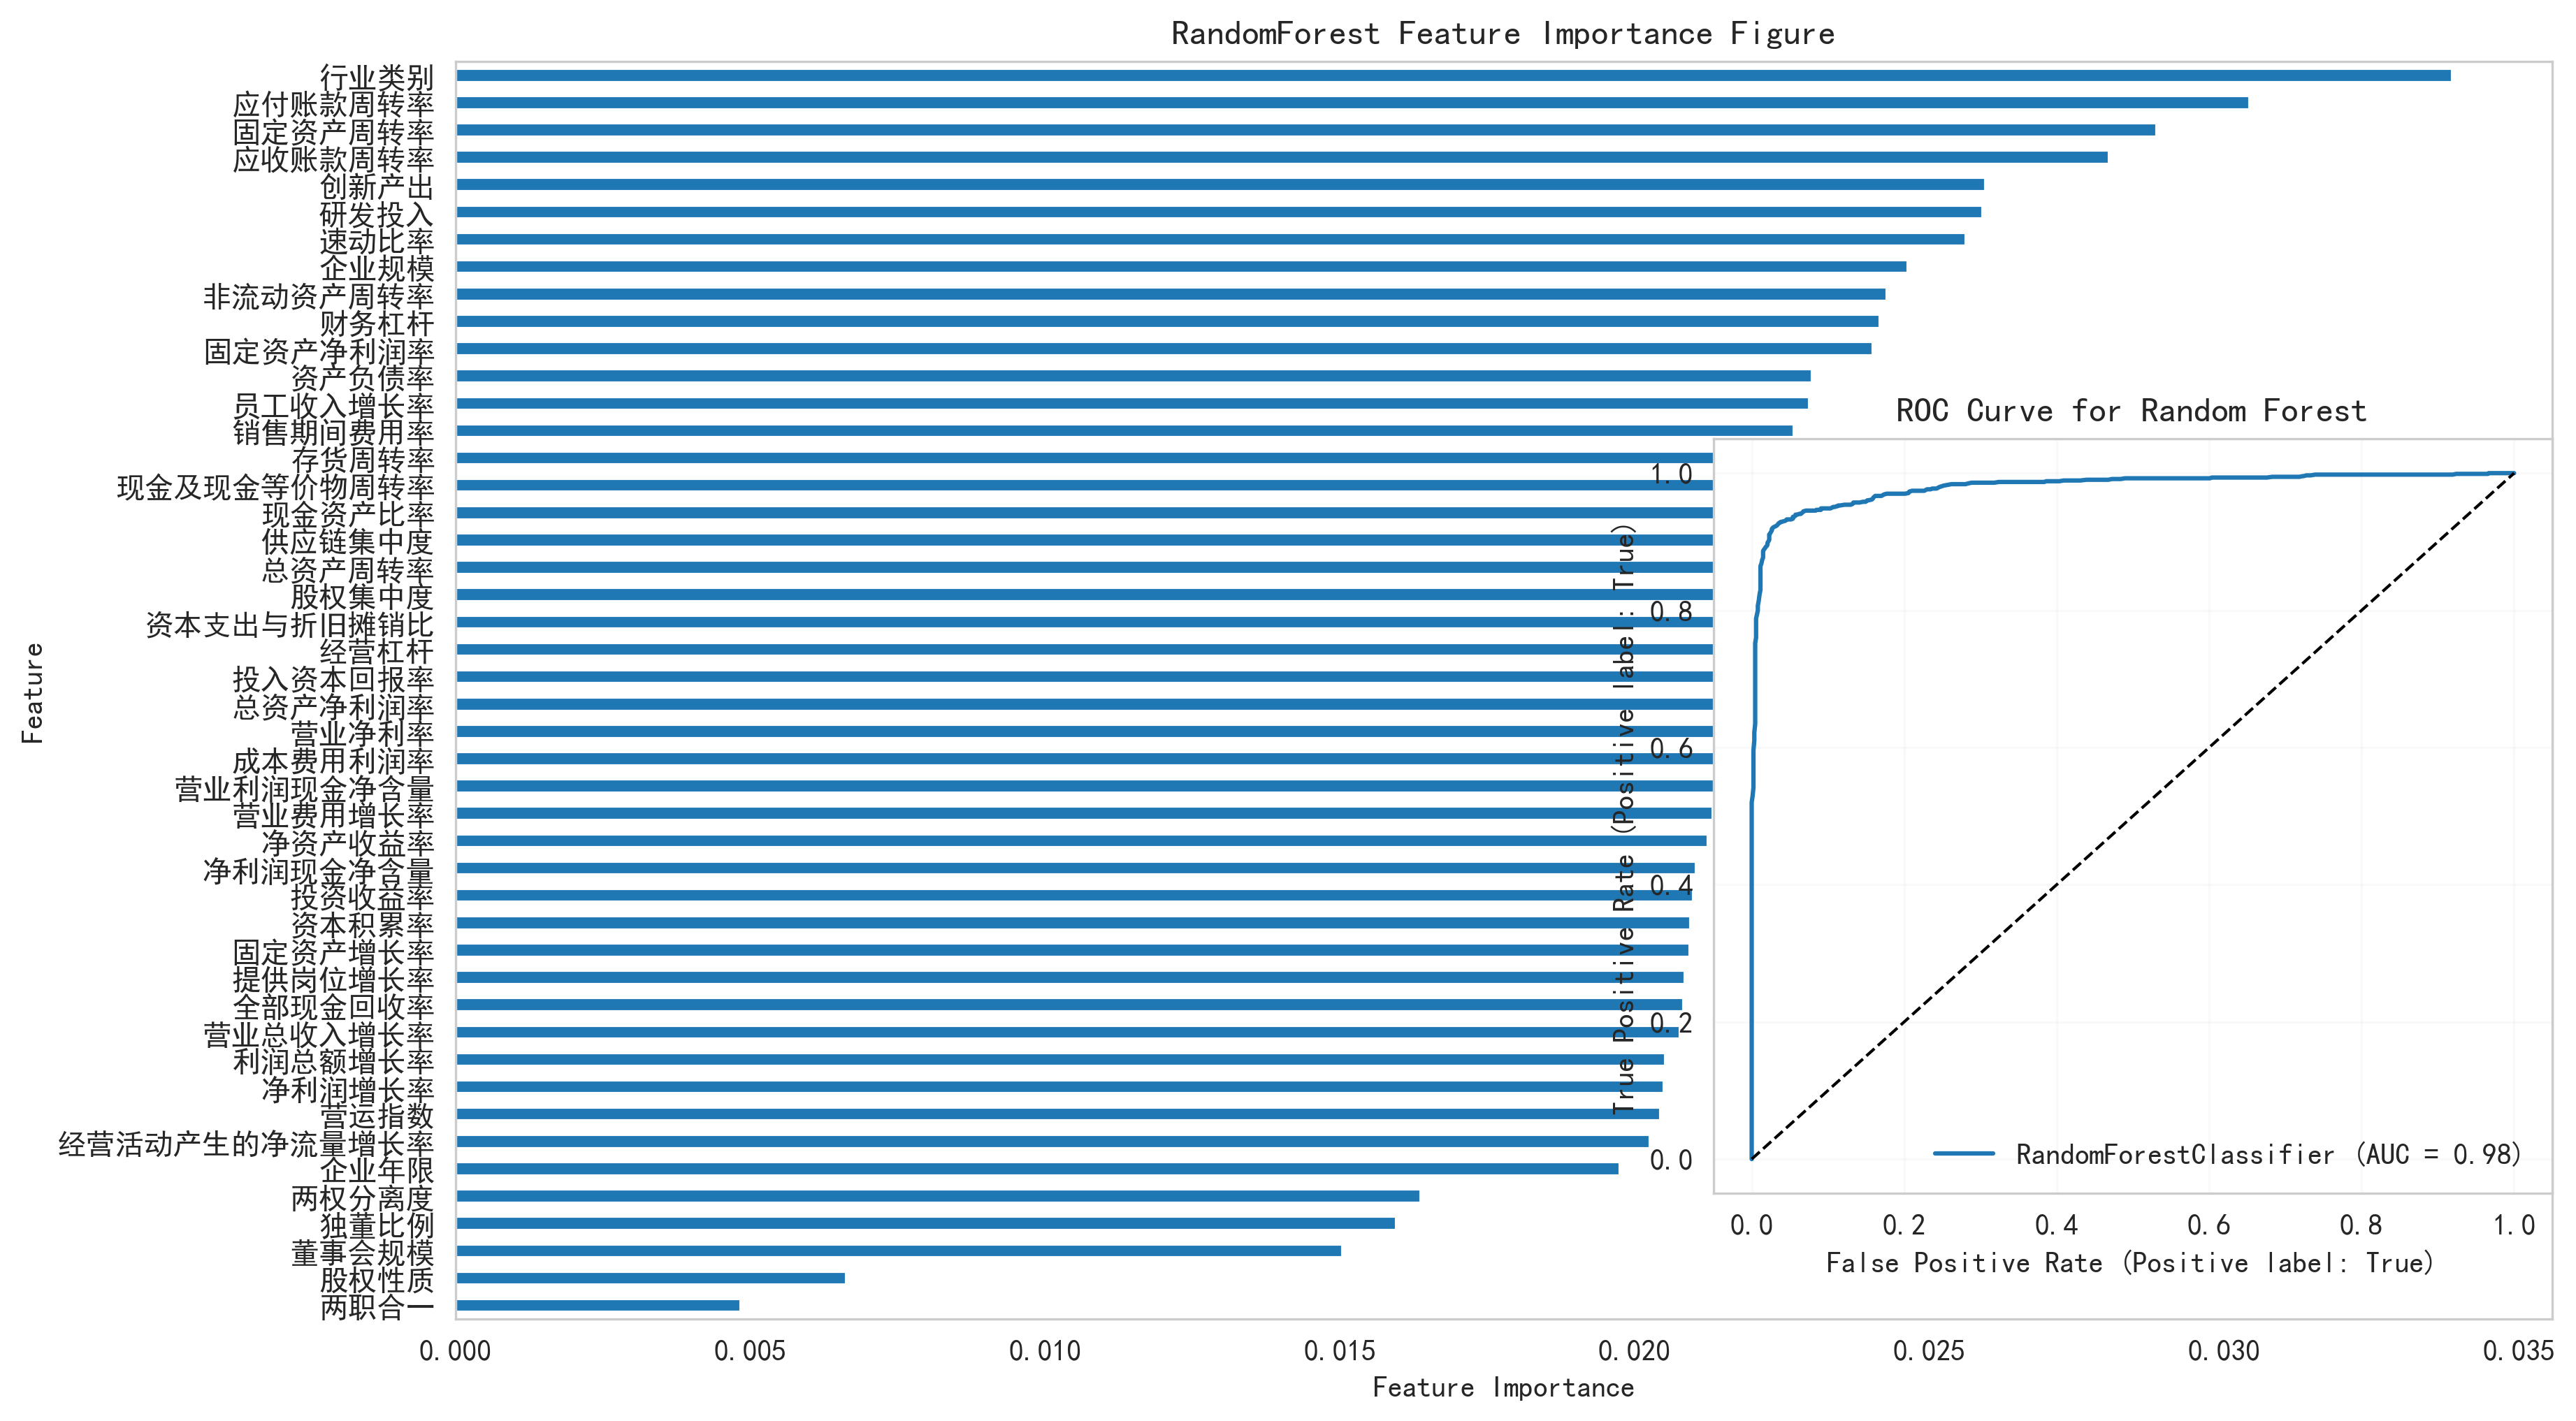

In [41]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pylab as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

fig = plt.figure(figsize=(10, 6), dpi=300)
ax = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([0.6, 0.1, 0.4, 0.6])

feature_importances = pd.Series(model.feature_importances_,index=model.feature_names_in_, name='重要度').sort_values()
feature_importances.plot.barh(ax=ax)
ax.set_yticks(np.arange(feature_importances.shape[0]), feature_importances.index)
s = RocCurveDisplay.from_estimator(model, X_test_s, y_test,ax=ax2)
x = np.linspace(0, 1, 100)
ax2.plot(x, x, 'k--', linewidth=1)
ax2.set_title('ROC Curve for Random Forest')

ax.set_xlabel('Feature Importance')
ax.set_ylabel('Feature')
ax.set_title('RandomForest Feature Importance Figure')
ax.grid(True, alpha=0)
ax2.grid(True, alpha=0.1)
plt.legend(frameon=False)
print(feature_importances[-20:].index)
# plt.savefig('./imgs/随机森林算法重要度排行图.png',transparent=True,bbox_inches = 'tight')
plt.show()

In [45]:
invdic = {
    '创新能力':['研发投入', '创新产出'],
    '营运能力':['固定资产周转率','应收账款周转率', '应付账款周转率','非流动资产周转率','总资产周转率','现金及现金等价物周转率'],
    '盈利能力':['固定资产净利润率','销售期间费用率','总资产净利润率', '净资产收益率'],
    '债偿能力':['现金资产比率','速动比率','资产负债率'],
    '风险能力':['财务杠杆','经营杠杆'],
    '其他能力':['存货周转率','供应链集中度','员工收入增长率','数字化转型程度(李寿喜)'], 
    '控制变量':['股票代码','截止日期','行业代码','股权性质','行业类别','企业年限','企业规模','股权集中度',]
}
names=[]
for values in invdic.values():
    names.extend(values)
matrix = dataset[names]
# matrix = zscore(matrix)
matrix.to_csv('./datas/因果机制研究数据.csv',index=False)
matrix

,研发投入,创新产出,固定资产周转率,应收账款周转率,应付账款周转率,非流动资产周转率,总资产周转率,现金及现金等价物周转率,固定资产净利润率,销售期间费用率,...,员工收入增长率,数字化转型程度(李寿喜),股票代码,截止日期,行业代码,股权性质,行业类别,企业年限,企业规模,股权集中度
0,2.109000,0.000000,3.523548,3.458554,5.448864,1.090310,0.607535,4.336145,0.516691,0.293542,...,0.161442,0.025148,000008,2015,37,0,34.0,23.0,22.001238,59.7158
1,2.115050,0.000000,6.141753,1.557378,2.560690,0.656685,0.318453,2.540432,1.736911,0.276482,...,0.161442,0.024287,000008,2016,37,1,34.0,24.0,22.826504,40.4339
2,2.284421,1.098612,10.894142,1.120923,2.200283,0.584658,0.247039,2.313311,4.157794,0.274435,...,0.161442,0.029846,000008,2017,37,1,34.0,25.0,23.091481,43.3944
3,2.348514,2.564949,9.277447,1.055270,2.016633,0.568076,0.242605,2.613693,1.236642,0.255879,...,0.454847,0.086655,000008,2018,37,1,34.0,26.0,23.071433,53.1931
4,2.239645,4.343805,8.568013,1.055270,1.975366,0.627695,0.286096,2.938497,1.217074,0.258271,...,0.166945,0.146958,000008,2019,37,1,34.0,27.0,23.211878,47.9013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18923,1.781709,5.541264,2.239293,9.586349,6.797269,1.089602,0.550639,2.805787,0.250924,0.045959,...,0.678182,0.007406,688388,2022,39,0,36.0,3.0,23.102420,42.4008
18924,2.663750,3.806662,5.260389,10.692951,1.956295,1.423212,0.372656,4.459631,1.525617,0.372481,...,0.161442,0.003295,688399,2019,27,0,24.0,0.0,20.866814,60.0395
18925,1.637053,3.761200,24.677481,17.988567,5.086773,4.567719,1.013789,4.679655,10.771007,0.206077,...,0.556871,0.002392,688399,2020,27,0,24.0,1.0,21.546420,57.8190
18926,1.560248,4.672829,7.437101,11.355289,3.797490,3.893681,0.982873,4.389304,3.125728,0.180713,...,0.678182,0.006045,688399,2021,27,0,24.0,2.0,21.975841,49.3659
